In [17]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [24]:
import pandas as pd

# Load dataset
df = pd.read_csv("boston_housing.csv")  # adjust if needed
df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [25]:
# View structure
df.info()

# View summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('boston_housing.csv')


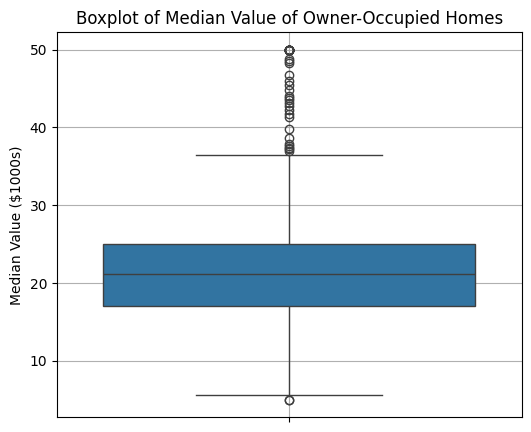

In [29]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000s)")
plt.grid(True)
plt.show()


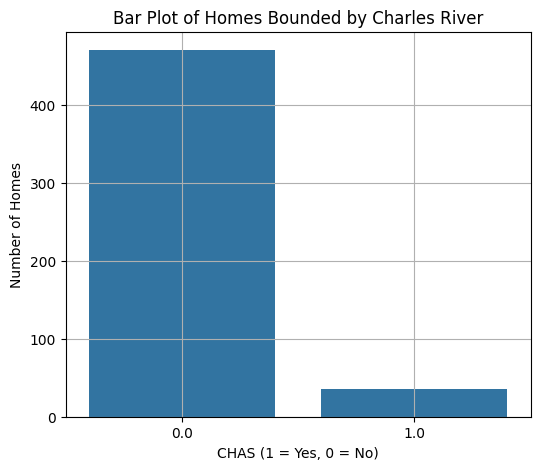

In [30]:
plt.figure(figsize=(6, 5))
sns.countplot(x='CHAS', data=df)
plt.title("Bar Plot of Homes Bounded by Charles River")
plt.xlabel("CHAS (1 = Yes, 0 = No)")
plt.ylabel("Number of Homes")
plt.grid(True)
plt.show()


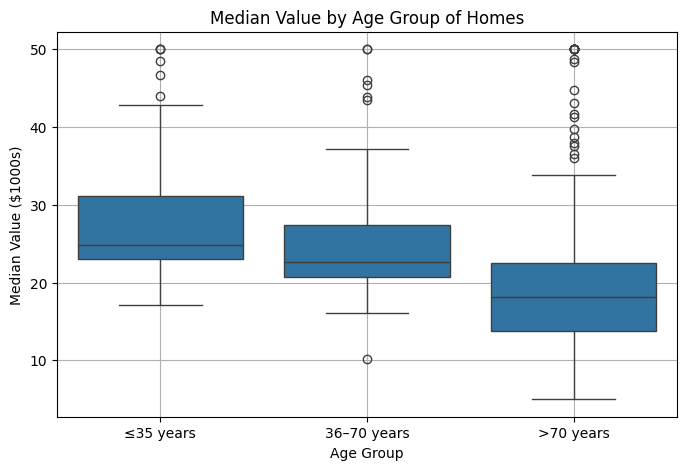

In [31]:
# Discretize AGE into 3 bins
df['AGE_GROUP'] = pd.cut(df['AGE'],
                         bins=[0, 35, 70, 100],
                         labels=['≤35 years', '36–70 years', '>70 years'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title("Median Value by Age Group of Homes")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000s)")
plt.grid(True)
plt.show()


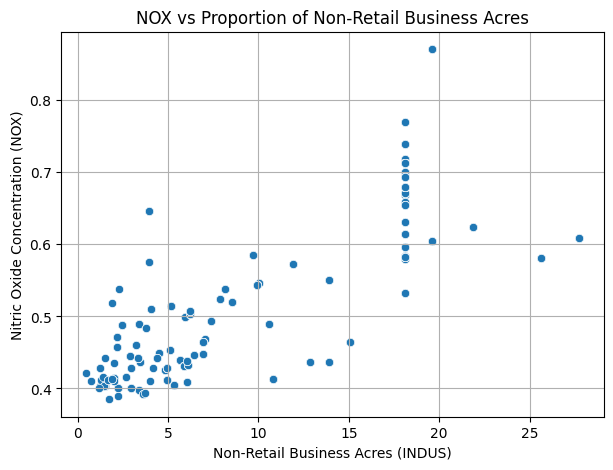

In [32]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title("NOX vs Proportion of Non-Retail Business Acres")
plt.xlabel("Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.grid(True)
plt.show()


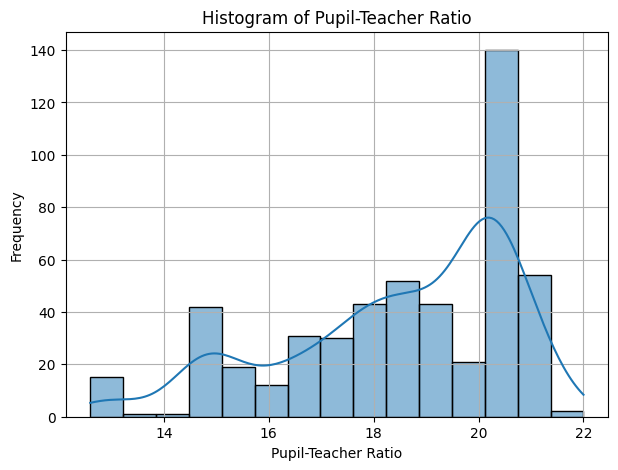

In [33]:
plt.figure(figsize=(7, 5))
sns.histplot(df['PTRATIO'], kde=True, bins=15)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# task 3

In [35]:
from scipy.stats import ttest_ind

# Split data
river_yes = df[df['CHAS'] == 1]['MEDV']
river_no = df[df['CHAS'] == 0]['MEDV']

# T-test
t_stat, p_val = ttest_ind(river_yes, river_no)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


T-statistic: 3.9964, P-value: 0.0001


In [36]:
from scipy.stats import f_oneway

# Bin AGE into 3 groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['≤35', '36–70', '>70'])

# Extract groups
group1 = df[df['AGE_GROUP'] == '≤35']['MEDV']
group2 = df[df['AGE_GROUP'] == '36–70']['MEDV']
group3 = df[df['AGE_GROUP'] == '>70']['MEDV']

# ANOVA
f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")


F-statistic: 36.4076, P-value: 0.0000


In [37]:
from scipy.stats import pearsonr

corr_coef, p_val = pearsonr(df['INDUS'], df['NOX'])
print(f"Correlation Coefficient: {corr_coef:.4f}, P-value: {p_val:.4f}")


Correlation Coefficient: 0.7637, P-value: 0.0000


In [38]:
import statsmodels.api as sm

X = sm.add_constant(df['DIS'])  # Add intercept
y = df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        12:46:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0